# Wstęp teoretyczny


Na zajęciach wgłebilismy się w programowanie obiektowe gdzie omówiono sam koncept tego i jak powinno się implementować obiekty w pythonie.

Samo programownie obiektowe polega na tworzeniu klas(typów), które grupują dane i funkcje, które je modyfikują. Klasa składa się z dwóch typów atrybutów, czyli:

* pola - obiekty które posiada dana klasa 
* metody  - funkcje w jakie wyposażona jest klasa

Sama konstrukcja klasy wygląda nastepująco: 

`class Klasa:  
 -konstruktor  
 -pola  
 -metody  `
 
Gdzie konstruktor to metoda, której zadaniem jest zainicjalizowanie pól konkretnej klasy.  
Konstruktor zapisujemy nastepująco : `__init__(self....) `    
**self** jest atrapą obiektu do której przypisujemy wartości poprzez odwołanie `self.pole = wartość`  
Przykład:  
` class Człowiek:
    def __init__(self,Imie):
        self.imie = Imie  
                            `  
                            
Metody dzielimy na:
* proste - atrybuty klasy, które można je przeciążać , ale odwoływac można sie do nich jedynie po utworzenia instancji danej klasy

* statyczne - atrybuty klasy, które wystepują w jednym egzemplarzu na klase i do których można odwoływac sie bez tworzenia jej instancji

Definiujemy je w podobny sposób jak funkcje poprzedzając je słowem **def**  
Przykład:  
` def metoda(x):
        return x**2 `  
        
       
Po utworzeniu takiego obiektu ` f = Funkcja() ` możemy się odwołać do niej w ten sposób `f.metoda(4)`  

Do wypisywania elementów naszej klasy używa sie metody `def __str__(jakiś łańcuch znaków) `.

Póżniej zaczeliśmy nowy temat którym jest biblioteka numpy.  

A szczególnie klase **ndarray** która reprezentuje tablice dowolnego wymiaru. Poniżej przedstawie kilka operacji jakie można wykonać na tej klasie:  
* tablica.ndim - Zwraca (int) liczbe wymiarów tabeli
* tablica.size - Zwraca (int) liczbe elementów tablicy
* tablica.shape - Zwraca (tuple) krotke z wymiarami tablicy

 

# Zadanie 1


In [5]:
class Prosta:
    def __init__(self,i):
        self.i = i
        
    def zwiekszam(self):
        self.i+=1
        return self.i

In [6]:
q1 = Prosta(4)
for i in range(4):
    q1.zwiekszam()
print(q1.i)


8


In [7]:
q2=Prosta("Witajcie")
#q2.zwiekszam()
#q2.zwiekszam() # nie można zwiekszyć stringa
print(q2.i)
q2.i=100
print(q2.i)

Witajcie
100


W tym wypadku można by było zamiast "Witajcie" wpisać jakąś liczbe i zacznie działać.

# Zadanie 2

In [8]:
from math import *
class F:
    def __init__(self,a,w):
        self.a = a
        self.w = w
    def value(self,x):
        return exp(-self.a*x)*sin(self.w*x)
    def __str__(self):
        return "f(x)=e**({}x)sin({}x)".format(self.a,self.w)

In [9]:
f = F(a=1.0, w=0.1)
print(f.value(x=pi))
f.a = 2
print(f.value(pi))

0.01335383513703555
0.0005770715401197441


In [10]:
print(f)

f(x)=e**(2x)sin(0.1x)


Zaimplementowałem klase F  zawierającą w sobie metode **value** która zwraca wartość funkcji.

# Zadanie 3

In [11]:
class Sygnal:
    def __init__(self,sig,size):
        self.sig = sig
        self.size = size
    
    def mean(self):
        return "średnia wynosi:{}".format(sum(self.sig)/self.size)
    
    def sd(self):
        mean = sum(self.sig)/self.size
        suma = [((i - mean)**2)/(self.size**(1/2)) for i in self.sig]
        return "odchylenie wynosi:{}".format(sum(suma))

    def trapezoid(self):
        pole = [(self.sig[i-1]+self.sig[i])/2 for i in range(1,self.size)]
        return "pole wynosi:{}".format(sum(pole))
    
    def mean_filter(self,window):
        new = self.sig[:]
        for i in range(self.size):
            if i==0: 
                new[i]=(self.sig[i]+self.sig[i+1])/2
                new[i+1]=new[i]
            elif 2<=i<=(self.size-(window)):
                new[i]=(self.sig[i-1]+self.sig[i+1])/2
            else:
                new[i]=(self.sig[i]+self.sig[i-1])/2 
                new[i-1]=new[i]
        return new

In [12]:
tab = [1, 1, 3, 4, 10, 20, 40, 70, 41, 22, 5, 1, 2]
w = Sygnal(tab,len(tab))
import matplotlib.pyplot as plt

In [20]:
print(w.mean())
print(w.trapezoid())
print(w.sd())
print(w.mean_filter(3))

średnia wynosi:16.923076923076923
pole wynosi:218.5
odchylenie wynosi:1525.1268548983358
[1.0, 1.0, 2.5, 6.5, 12.0, 25.0, 45.0, 40.5, 46.0, 23.0, 3.0, 1.5, 1.5]


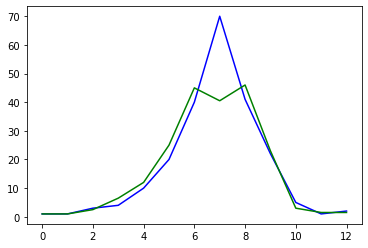

In [15]:
plt.plot(tab,'b')
plt.plot(w.mean_filter(3),'g')

In [16]:
syg_noisy = [ 0.07035213, 0.05096267, 0.05482224, 0.21644296, 0.50977906, 0.78576652, 0.93998998, 0.95239758, 0.74208692, 0.42561928, 0.25394896, 0.15392354, 0.05162752, -0.00120213]



In [17]:
q = Sygnal(syg_noisy,len(syg_noisy))
print(q.mean_filter(3))

[0.0606574, 0.0606574, 0.133702815, 0.28230065, 0.50110474, 0.72488452, 0.86908205, 0.84103845, 0.68900843, 0.49801794, 0.28977141, 0.10277553, 0.025212695, 0.025212695]


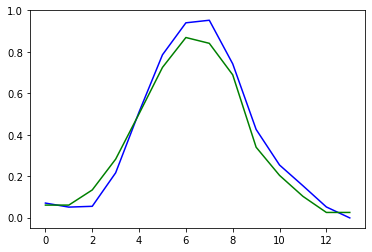

In [19]:
plt.plot(syg_noisy,'b')
plt.plot(q.mean_filter(5),'g')

Tu zaimplementowałem klase z metodami które zwracają średnia, pole i odchylenie standardowe wpisanego do niej sygnału jak również metode filtrującą dane której wyniki widzimy na wykresach gdzie niebieski wykres to stan przed filtracja a zielony po.

# Zadanie 4

In [536]:
class Sprezyna:
    def __init__(self,k):
        self.k = k
      
    def silna(self,x):
        return  self.k*x
    
    def energia(self,x):
        return (self.k*x**2)/2
    

In [537]:
def table_fun(f, a, b, n, naglowek=''):
    print(naglowek)
    h = abs(b-a)/float(n)
    for i in range(n):
        x = a + i*h
        print(f"wartosc funkcji = {f(x)} w punkcie x={x}")

In [538]:
q = Sprezyna(3)

In [539]:
table_fun(q.silna,1,10,3,"Siła")

Siła
wartosc funkcji = 3.0 w punkcie x=1.0
wartosc funkcji = 12.0 w punkcie x=4.0
wartosc funkcji = 21.0 w punkcie x=7.0


In [540]:
table_fun(q.energia,1,10,3,"Energia")

Energia
wartosc funkcji = 1.5 w punkcie x=1.0
wartosc funkcji = 24.0 w punkcie x=4.0
wartosc funkcji = 73.5 w punkcie x=7.0


Zaimplementowana klasa Sprężyna z metodami siła która zwraca wartość siły naciagu i energia która zwraca wartość energi.

# Zadanie 5

In [548]:
class Nieliniowa_sprezyna:
    '''
    klasa liczy siłe naciągniecia sprężyny i 
    jej energie potęcjalną metodą trapezów
    
    '''
    def __init__(self):
        pass
      
    def sila(self,x):
        return  self.k*x
    
    def energia(self,f,a,b,n):
        dx = (b-a)/n
        pole = [f(a+i*dx) for i in range(1,n)]
        return dx*(sum(pole)+(f(a)+f(b))/2)
    

In [554]:
class F:
    '''
    w tej klasie podajemy kolejno wspolczyniki a i k
    do funkcji1(asinx) i funckji2(kx)
    
    '''
    def __init__(self,a,k):
        self.a = a
        self.k = k
    def funkcja1(self,x):
        return self.a*sin(x)
    def funkcja2(self,x):
        return self.k * x
    

In [555]:
p = Nieliniowa_sprezyna()
f = F(2,3)

In [558]:
p.energia(f.funkcja1,0,5,100)

1.4323771425469956

In [559]:
p.energia(f.funkcja2,0,5,100)

37.50000000000001

Podobna operacja ale nieliniowo.

# Zadanie 6

In [4]:
class Pacjent:
    def __init__(self,imie,nazwisko,pesel,oddział):
        self.imie = imie
        self.nazwisko = nazwisko
        self.pesel = pesel
        self.oddział = oddział
    def __str__(self):
           return " Imie:{}\n Nazwisko:{}\n Pesel:{}\n Oddział:{}\n".format(self.imie,self.nazwisko,self.pesel,self.oddział)

In [27]:
pacjent1 = Pacjent("Zbigniew","Kordyl",123,"Narutowicza")
pacjent2 = Pacjent("Tomasz","Grabowski",321,"Pawła")
print(pacjent1,"\n",pacjent2)

 Imie:Zbigniew
 Nazwisko:Kordyl
 Pesel:123
 Oddział:Narutowicza
 
  Imie:Tomasz
 Nazwisko:Grabowski
 Pesel:321
 Oddział:Pawła



In [91]:
class Pacjenci:
    pacjenci = []
    def __init__(self,x):
        Pacjenci.pacjenci.append(x)
        
    def pokaz_pacjentow(self,oddz=""):
        for i in Pacjenci.pacjenci:
            if oddz==i.oddział:
                print(i)
            if oddz!=i.oddział:
                print(i)
        
    def licz_pacjenta(self,oddz=""):
        count = 0
        if oddz:
            for i in Pacjenci.pacjenci:
                if oddz==i.oddział:
                       count+=1
        else:
            for i in Pacjenci.pacjenci:
                       count+=1
            
        print(count)
        
    def znajdz_pacjenta(self,pesel):
            for i in Pacjenci.pacjenci:
                if pesel==i.pesel:
                       print(i)
                        
    def wypisz_pacjenta(self,pesel):
            for i in Pacjenci.pacjenci:
                if pesel==i.pesel:
                       Pacjenci.pacjenci.remove(i)
            

In [92]:
pacjenci = Pacjenci(pacjent1)
pacjenci = Pacjenci(pacjent2)

In [93]:
pacjenci.pokaz_pacjentow()

 Imie:Zbigniew
 Nazwisko:Kordyl
 Pesel:123
 Oddział:Narutowicza

 Imie:Tomasz
 Nazwisko:Grabowski
 Pesel:321
 Oddział:Pawła



In [94]:
pacjenci.licz_pacjenta()

2


In [95]:
pacjenci.znajdz_pacjenta(321)

 Imie:Tomasz
 Nazwisko:Grabowski
 Pesel:321
 Oddział:Pawła



In [96]:
pacjenci.wypisz_pacjenta(123)

In [99]:
pacjenci.pokaz_pacjentow()

 Imie:Tomasz
 Nazwisko:Grabowski
 Pesel:321
 Oddział:Pawła



Stworzona klasa która imituje szpitalna baze danych gdzie można znaleść pacjenta, usunać go i  wpisać.

# Zadanie 7

In [30]:
dic = {"U":{"U":{"U":"Phe","C":"Phe","A":"Leu","G":"Leu"}
                ,"C":{"U":"Ser","C":"Ser","A":"Ser","G":"Ser"},
                "A":{"U":"Tyr","C":"Tyr","A":"Stop","G":"Stop"},
                "G":{"U":"Cys","C":"Cys","A":"Stop","G":"Trp"}},
       "C":{"U":{"U":"Leu","C":"Leu","A":"Leu","G":"Leu"},
            "C":{"U":"Pro","C":"Pro","A":"Pro","G":"Pro"},
            "A":{"U":"His","C":"His","A":"Gin","G":"Gin"},
            "G":{"U":"Arg","C":"Arg","A":"Arg","G":"Arg"}},
       "A":{"U":{"U":"Ile","C":"Ile","A":"Ile","G":"Met"},
            "C":{"U":"Thr","C":"Thr","A":"Thr","G":"Thr"},
            "A":{"U":"Asn","C":"Asn","A":"lys","G":"Lys"},
            "G":{"U":"Ser","C":"Ser","A":"Arg","G":"Arg"}},
       "G":{"U":{"U":"Val","C":"Val","A":"Val","G":"Val"},
            "C":{"U":"Ala","C":"Ala","A":"Ala","G":"Ala"},
            "A":{"U":"Asp","C":"Asp","A":"Glu","G":"Glu"},
            "G":{"U":"Gly","C":"Gly","A":"Gly","G":"Gly"}}}

Sek = {"T":"A","A":"U","C":"G","G":"C","U":"U"}

In [120]:
class Biomatrix:
    def __init__(self,DNA):
        self.DNA = DNA
    
    def transkrypcja(self):
        new_sekw = [Sek[i] for i in self.DNA]
        return new_sekw

    def translacja(self):
        x=self.transkrypcja()
        new_sekw=""
        z=False
        for i in range(0,len(x),3):
            y=dic[x[i]][x[i+1]][x[i+2]]
            if y=="Met": 
                z=True
            if z:
                if y=="Stop":
                    print("STOP")
                    return new_sekw
                else:
                    new_sekw+=" " + y
        
        return new_sekw
            
    def find_promotor(self):
        x=self.transkrypcja()
        for i in range(0,len(x),3):
            if dic[x[i]][x[i+1]][x[i+2]]=="Met":
                print("Znaleziono Met")
            else:
                print("Nie znaleziono Met")
                
    def find_terminator(self):
        x=self.transkrypcja()
        for i in range(0,len(x),3):
            if dic[x[i]][x[i+1]][x[i+2]]=="STOP":
                return i
            
        print("Nie znaleziono terminatora")
                   
   
    

In [121]:
bio = Biomatrix("TACTAGTAGCCGGGCAAAUAAAAATACAAA")

In [122]:
print(" ".join(bio.transkrypcja()))

A U G A U C A U C G G C C C G U U U U U U U U U A U G U U U


In [123]:
print(bio.translacja())

 Met Ile Ile Gly Pro Phe Phe Phe Met Phe


In [124]:
print(bio.find_promotor())

Znaleziono Met
Nie znaleziono Met
Nie znaleziono Met
Nie znaleziono Met
Nie znaleziono Met
Nie znaleziono Met
Nie znaleziono Met
Nie znaleziono Met
Znaleziono Met
Nie znaleziono Met
None


In [125]:
print(bio.find_terminator())

Nie znaleziono terminatora
None


Usprawnienie zadanie z poprzednich zajęć przy użyciu klas.

# Zadanie z zajęć

In [2]:
class Dane:
    def __init__(self,dane,rozmiar):
        self.dane = dane
        self.rozmiar = rozmiar
    def srednia(self):
        return sum(self.dane)/self.rozmiar
    def odchylenie(self):
        return sum([((i - self.srednia())**2)/(self.rozmiar**(1/2)) for i in self.dane])
    
    def filtruj_dane(self):
        for i in range(self.rozmiar):
            if self.dane[i]<0:
                self.dane[i]=(self.dane[i-1]+self.dane[i+1])/2
        print(self.dane)
    
    def __str__(self):
        return f"srednia {self.srednia()} i  odchylenie {self.odchylenie()}"

In [3]:
l = [2.04, -22, 1.01, 0.33, -111, 4.05, 9.99, 2.21]
dn = Dane(l,len(l))
print(dn.srednia())
print(dn.odchylenie())
print(dn)
dn.filtruj_dane()

-14.171250000000002
4003.9153168976322
srednia -14.171250000000002 i  odchylenie 4003.9153168976322
[2.04, 1.525, 1.01, 0.33, 2.19, 4.05, 9.99, 2.21]


# Wnioski

Na tych zajęciach miałem okazję przekonać się jak przydatne jest programowanie obiektowe i jak wiele możliwości daje. Też jest to dobre odświeżenie wiedzy chociaż porównując programownie obiektowe do tego z C++ powiedziałbym że w pythonie jest to bardziej przejrzyste.

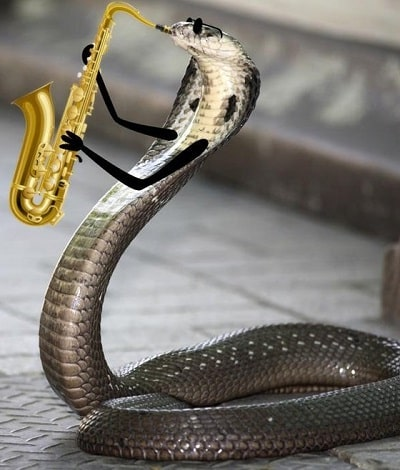